In [1]:
import pandas as pd
import numpy as np

### example

In [2]:
births = pd.read_csv("births.csv")

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
# male and female births vs decade
births["decade"] = 10 * (births["year"] // 10)
res = births.pivot_table("births", index="decade", columns="gender", aggfunc="sum", observed=False)
res

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0.5, 1.0, 'total births per decade')

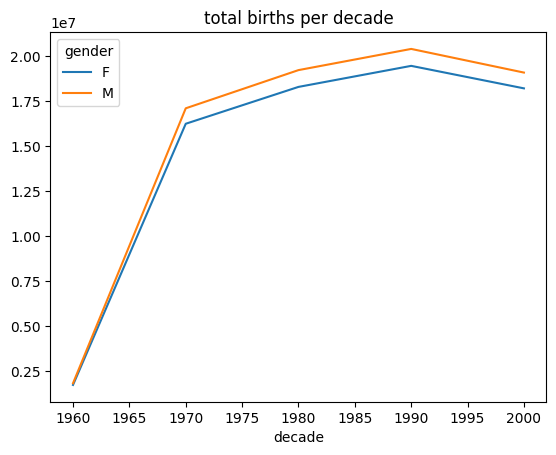

In [5]:
ax = res.plot()
ax.set_title("total births per decade")

In [6]:
# male and female births vs decade
births["decade"] = 10 * (births["year"] // 10)
res = births.pivot_table("births", index="decade", columns="gender", aggfunc="mean", observed=False)
res

gender,F,M
decade,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


Text(0.5, 1.0, 'total births per decade')

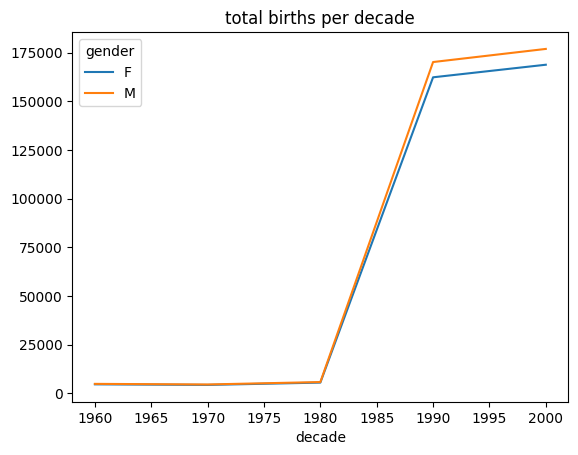

In [7]:
ax = res.plot()
ax.set_title("total births per decade")

In [8]:
# the births field
births["births"].describe()

count     15547.000000
mean       9762.293561
std       28552.465810
min           1.000000
25%        4358.000000
50%        4814.000000
75%        5289.500000
max      199622.000000
Name: births, dtype: float64

In [9]:
# outlier removal via sigma-clipping operation
quartiles = np.percentile(births["births"], [25, 50, 75])
print(f"quartiles: {quartiles}")
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # 0.74 is the interquartile range of a Gaussian distribution

quartiles: [4358.  4814.  5289.5]


In [10]:
print(len(births))
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
print(len(births))

15547
14610


In [11]:
births.value_counts("decade")

decade
1970    7304
1980    6576
1960     730
Name: count, dtype: int64

In [12]:
# format conversion on cleaned data
births["day"] = births["day"].astype(int)

In [13]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format="%Y%m%d")
births["dayofweek"] = births.index.dayofweek

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

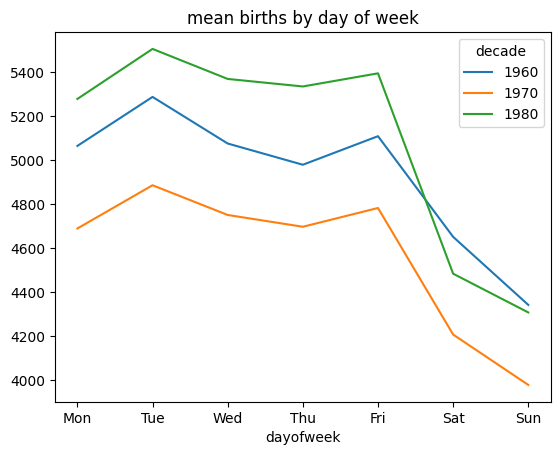

In [14]:
res = births.pivot_table("births", index="dayofweek", columns="decade", aggfunc="mean", observed=False)
ax = res.plot()
ax.set_title("mean births by day of week")
ax.set_xticks(np.arange(7))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


Text(0.5, 1.0, 'mean births by day of year')

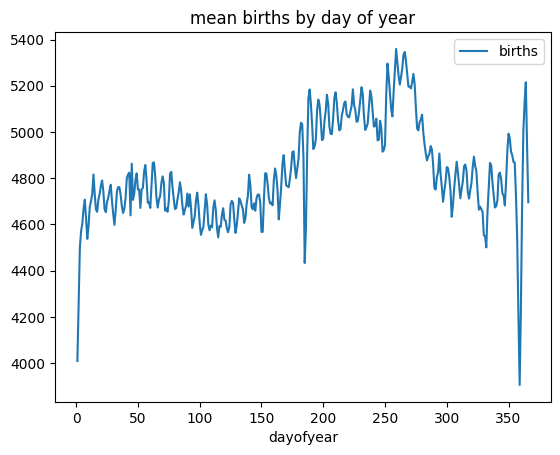

In [16]:
# mean number of births by day of the year
births["dayofyear"] = births.index.dayofyear
res = births.pivot_table("births", index="dayofyear", aggfunc="mean", observed=False)
ax = res.plot()
ax.set_title("mean births by day of year")